In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

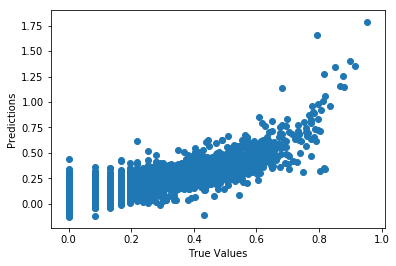

[ -2.22627724e-11   1.57577480e-04   3.46335751e-05  -1.82383381e-02
   1.69762846e-01  -1.01677128e+01   1.00607502e+00  -1.45602208e+01
  -1.25912589e-03   1.86953377e-04  -1.40354527e+00   9.44030778e-01
   8.19280423e+01  -2.70751748e+00  -4.42079479e-04   2.81866823e-04
   1.46525521e-03  -2.43715216e-04   3.73989273e-01  -2.00850899e-01
  -5.62120713e-02   3.50731027e-01  -4.42291675e+01   1.32582792e+00
  -1.30438404e+00   1.09936553e-02   3.25795677e+02  -1.70473766e+02
   4.45251256e-07   5.86330073e-03  -2.21468221e-05   1.23242834e-03
  -1.56517411e-05   8.02664680e-05  -1.16248538e-05   4.32791548e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.6690438   0.73576685  0.67777695  0.70745193  0.72231417  0.71504356
  0.68853252  0.66655577  0.62226995  0.5753992 ]


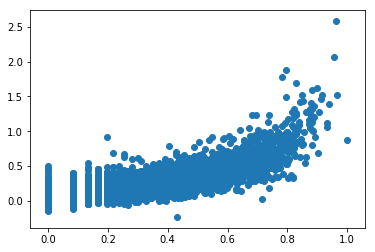

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.692774089095


In [9]:
print(lm.coef_)

[ -2.22627724e-11   1.57577480e-04   3.46335751e-05  -1.82383381e-02
   1.69762846e-01  -1.01677128e+01   1.00607502e+00  -1.45602208e+01
  -1.25912589e-03   1.86953377e-04  -1.40354527e+00   9.44030778e-01
   8.19280423e+01  -2.70751748e+00  -4.42079479e-04   2.81866823e-04
   1.46525521e-03  -2.43715216e-04   3.73989273e-01  -2.00850899e-01
  -5.62120713e-02   3.50731027e-01  -4.42291675e+01   1.32582792e+00
  -1.30438404e+00   1.09936553e-02   3.25795677e+02  -1.70473766e+02
   4.45251256e-07   5.86330073e-03  -2.21468221e-05   1.23242834e-03
  -1.56517411e-05   8.02664680e-05  -1.16248538e-05   4.32791548e-05]
